# Energy Evolution

The energy density of the two scenarios are:

- scenario 1:$\rho_1(a)/\rho_{\rm cr} = \Omega_{\rm CDM,1}a^{-3} + \Omega_{r}a^{-4}$;
- scenario 2:$\rho_1(a)/\rho_{\rm cr} = \Omega_{\rm CDM,2}a^{-3} + \Omega_{r}a^{-4} I(a)$.

with condition $\Omega_{\rm CDM,1} = \Omega_{\rm CDM,2}+(I(1)-1)\Omega_r$.

In [21]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
plt.style.use('default')

Omega_nu = 1e-4 # approx
rho_cr = 1.88e-29 / 0.67 / 0.67 # g/cm^3
m_nu = 0.06 # eV
T_nu = 1.7e-4 # eV

MIN = 1e-10

C = m_nu/T_nu

In [22]:
def integrand(x, a):
    sqrt = np.sqrt(x*x + C*C*a*a)
    return x*x*sqrt*np.exp(-x)/(np.exp(-x) + 1)

def inte_res(a):
    res, _ = integrate.quad(integrand, 0, np.inf, args=(a,), epsabs=1e-8, epsrel=1e-8, limit=200)
    return res

def inte_res_array(a_vals):
    a_vals = np.atleast_1d(a_vals)
    return np.array([inte_res(a) for a in a_vals])

Omega_CDM1 = 1 - Omega_nu
Omega_CDM2 = 1 - Omega_nu * inte_res(1) / inte_res(0)

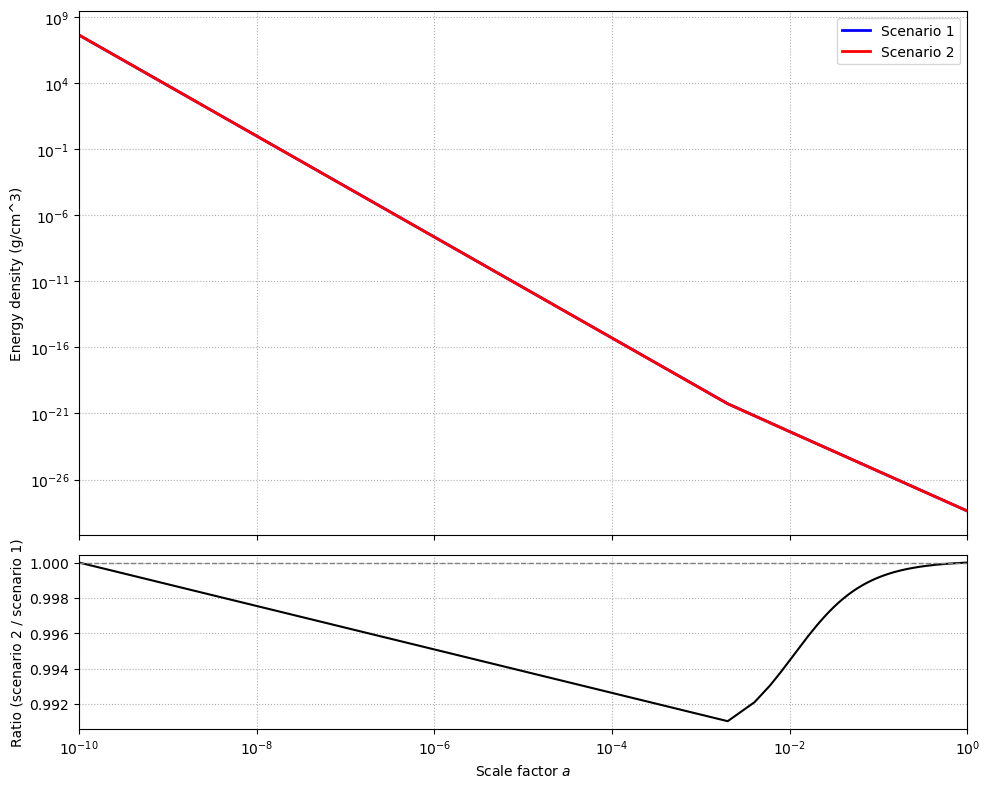

In [24]:
a_arr = np.linspace(MIN, 1, 500)

y1 = rho_cr * (Omega_CDM1 * pow(a_arr, -3) + Omega_nu * pow(a_arr, -4))
y2 = rho_cr * (Omega_CDM2 * pow(a_arr, -3) + Omega_nu * inte_res_array(a_arr) * pow(a_arr, -4) / inte_res(0))


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8),gridspec_kw={'height_ratios':[3, 1]})

# top: energy densities (log-log)
ax1.loglog(a_arr, y1, 'b-', label='Scenario 1', linewidth=2)
ax1.loglog(a_arr, y2, 'r-', label='Scenario 2', linewidth=2)
ax1.set_ylabel('Energy density (g/cm^3)')
ax1.grid(True, which='both', ls=':')
ax1.legend()
ax1.set_xlim(MIN, 1)

# bottom: ratio y2/y1 (x-axis shared, log-scale)
with np.errstate(divide='ignore', invalid='ignore'):
    ratio = y2 / y1
mask = np.isfinite(ratio)

ax2.set_xscale('log')
ax2.plot(a_arr[mask], ratio[mask], 'k-')
ax2.axhline(1.0, color='grey', ls='--', lw=1)
ax2.set_xlabel('Scale factor $a$')
ax2.set_ylabel('Ratio (scenario 2 / scenario 1)')
ax2.grid(True, which='both', ls=':')

plt.tight_layout()
plt.show()